# Lecture 10: Linear regression with R
- Linear regression
    - Simple linear regression
    - Multiple linear regression
- Analysis of variance (ANOVA)

## 10.1 Linear regression
### 10.1.1 Simple linear regression
##### I will use simulated data for this section. This will help you understand model assumptions.
##### For this lecture, try to understand the data generating process.
##### Some background information.
- I spent a few weeks shopping for a diamond ring.
- I browsed many diamonds with G or H <u>c</u>olor, VVS1 or VVS2 <u>c</u>larity, excellent <u>c</u>ut and between 1.00 and 1.50 <u>c</u>arats.
    - I found out that the prices of such diamonds were predictable.
    - My gut feeling was that there was an algorithm for pricing, which waw then rounded it to the nearest 100x.
- As a statistician, I was thinking of fitting a linear regression to explore the relationship between the 4C's and the price.
    - So that I could pick the one that was significantly cheaper than it should be according to my statistical model.
    - Therefore having the best price-quality ratio.
    - I was too young and naive.
- <b>The most important thing is carat!</b>
- But still the other 3C's and some other minor factors may affect the price by a smaller margin.
    - G color is more expensive, H color is less expensive.

#### The assumptions on the small effects are,
- Normal distribution.
    - This small deviation is <b>normally distributed with mean 0.
- Constant variance.
    - This small deviation is the same for all diamonds, <b>regardless of carat</b>.

#### Therefore the data follows,
$$ price_i = \beta_0 + \beta_1 \times carat_i + \epsilon_i $$
where $\epsilon_i \sim_{i.i.d} Normal(0, \sigma^2)$ is the small deviation, which is sometimes called the noise.

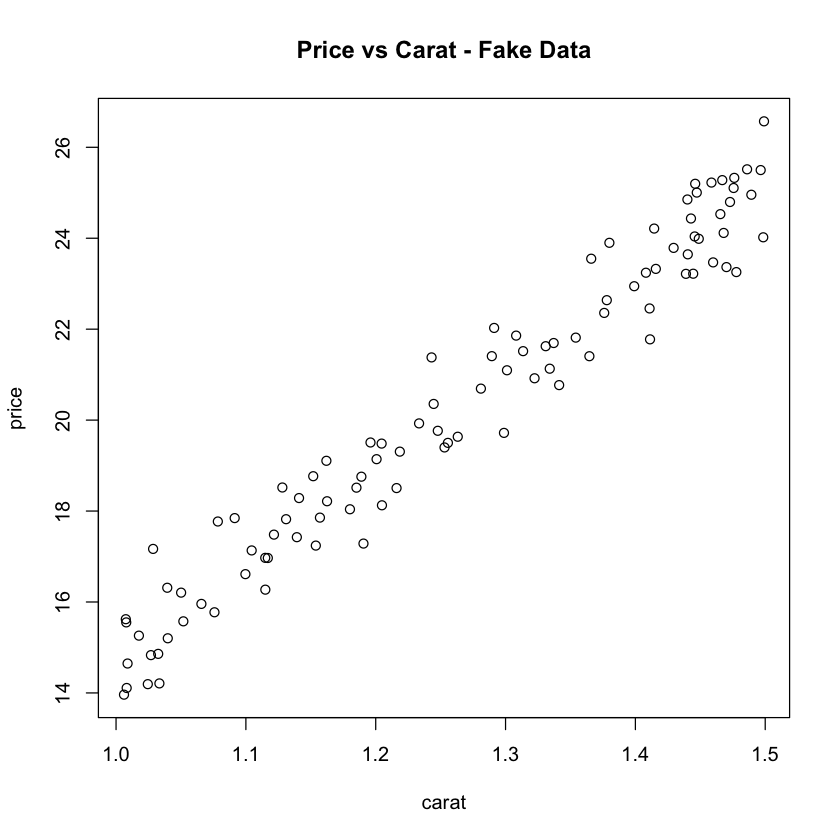

In [1]:
# Set seed for reproducibility
set.seed(613)

# 100 diamond rings ranging from 1 to 1.5 carats
n <- 100
carat <- runif(n = n, min = 1, max = 1.5)
color <- as.factor(sample(c("G", "H"), size = n, replace = TRUE))

# Normally distributed deviation from my perfect model caused by other factors
error <- rnorm(n = n, mean = 0, sd = 0.5)

# On average:
# 1.00 carat: $10k;
# ................;
# 1.50 carat: $20k;

# Comparing to the average price.
# G color increases the price by 500
# H color decreases the price by 500
price <- -5 + 20 * carat + error + ifelse(color == "G", 0.5, -0.5)

plot(x = carat, y = price, main = "Price vs Carat - Fake Data")

#### The model is,
$$ \widehat{price}_i = \hat{\beta}_0 + \hat{\beta}_1 \times carat_i $$

The goal is to de-noise and capture the association - find a straight line that best describes the association. How?

Consider the residual ($e_i$), which is the deviation of the observed data from the best fit line.

$$ e_i = price_i - \widehat{price_i} = price_i - (\hat{\beta}_0 + \hat{\beta}_1 \times carat_i) $$

It makes sense to find a line that minimizes the sum of the residuals squared $ \sum_{i=1}^n e_i^2 $.

Why squared?

#### The math is,
in EPIB 621.

There is closed-form solution to linear model coefficients - nice.

#### Fit a linear model of the data considering only carat

In [2]:
fit1 <- lm(price~carat); fit1


Call:
lm(formula = price ~ carat)

Coefficients:
(Intercept)        carat  
     -6.159       20.903  


In [3]:
# If our data is a data.frame, note the data argument.
diamond <- data.frame(Price = price, Carat = carat, Color = color)
head(diamond)
aggregate(Price~Color, data = diamond, mean)
table(diamond$Color)

Price,Carat,Color
<dbl>,<dbl>,<fct>
24.95654,1.489319,G
23.25550,1.477755,H
15.57460,1.051832,H
21.77606,1.411278,H
18.21557,1.162526,G
24.53011,1.465442,G


Color,Price
<fct>,<dbl>
G,21.54011
H,19.09459



 G  H 
48 52 

In [4]:
fit1 <- lm(Price~Carat, data = diamond)
summary(fit1)


Call:
lm(formula = Price ~ Carat, data = diamond)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56430 -0.56169 -0.02658  0.60028  1.82743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.1591     0.6008  -10.25   <2e-16 ***
Carat        20.9027     0.4715   44.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7509 on 98 degrees of freedom
Multiple R-squared:  0.9525,	Adjusted R-squared:  0.952 
F-statistic:  1966 on 1 and 98 DF,  p-value: < 2.2e-16


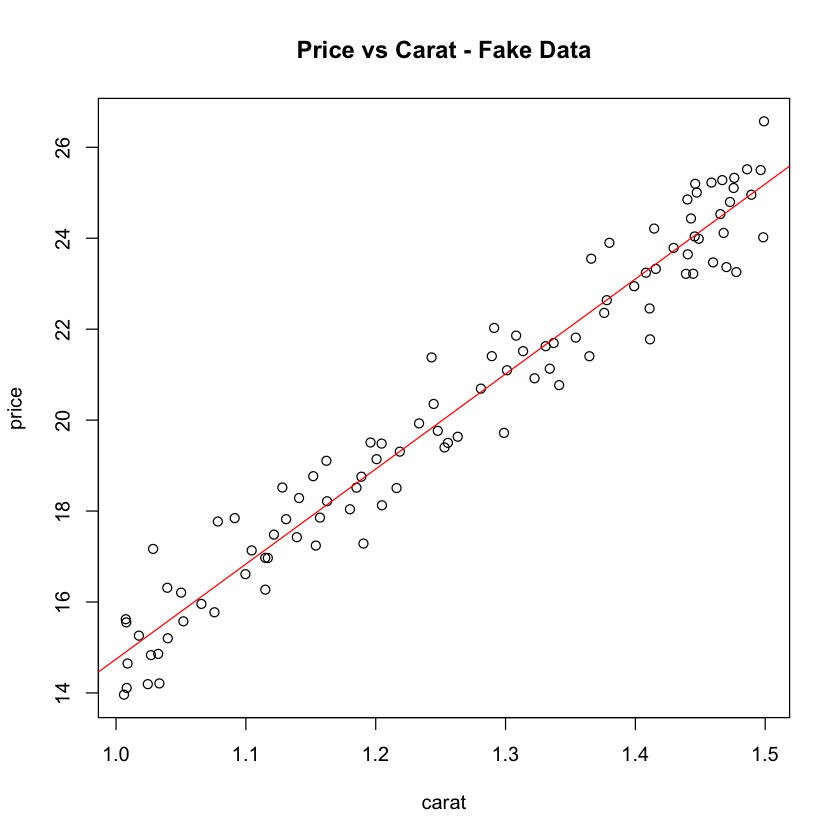

In [5]:
plot(x = carat, y = price, main = "Price vs Carat - Fake Data")
# Draw the best fit line from our linear model.
abline(fit1, col = "red")

In [6]:
# Explore the structure of fit1 and summary(fit1) to see how to extract values.
# str(fit1)
# str(summary(fit1))

#### Interpretation of the coefficients along with confidence intervals of the estimated coefficients.

In [7]:
summary(fit1)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.159122,0.6007728,-10.25200,3.437439e-17
Carat,20.902675,0.4714502,44.33697,1.167533e-66


In [8]:
# Confidence intervals - default is 95%
confint(fit1, level = 0.95)

,2.5 %,97.5 %
(Intercept),-7.351336,-4.966908
Carat,19.967097,21.838252


#### Check model fit and assumptions using plots
- First plot checks the constant variance assumpation
- Second plot checks the normality assumption

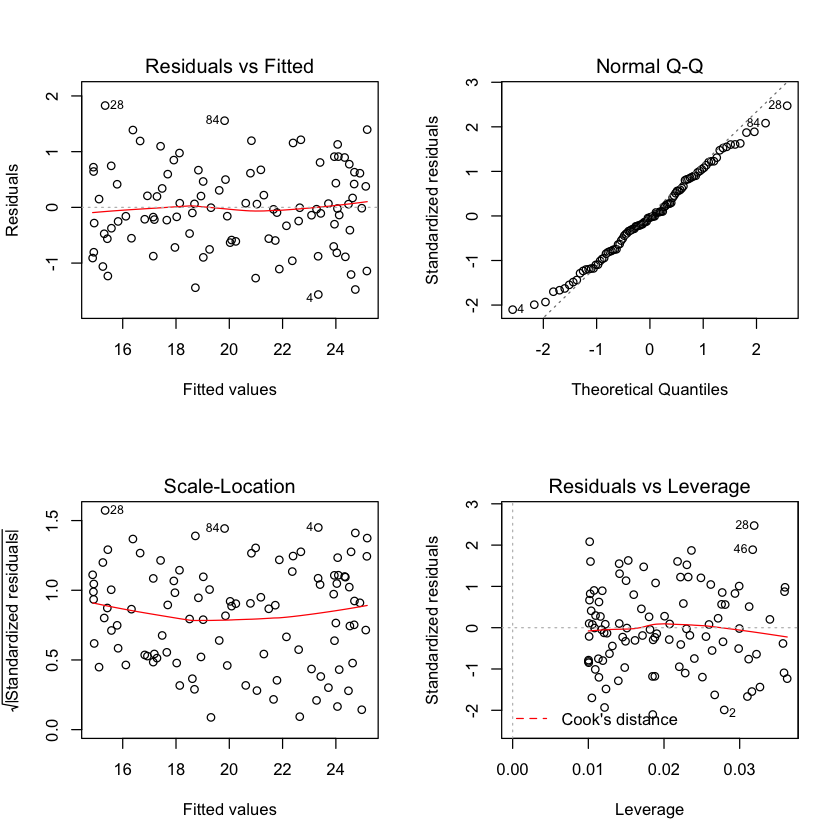

In [9]:
par(mfrow = c(2,2))
plot(fit1)

### 10.1.2 Multiple linear regression
Simply more than one $x$'s.

#### Fit a linear model considering both carat and color

In [10]:
fit2 <- lm(Price~Carat+Color, data = diamond)
summary(fit2)


Call:
lm(formula = Price ~ Carat + Color, data = diamond)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94938 -0.42954 -0.02353  0.34489  1.09171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.6503     0.4227  -11.00   <2e-16 ***
Carat        20.1772     0.3209   62.88   <2e-16 ***
ColorH       -1.1376     0.1023  -11.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5004 on 97 degrees of freedom
Multiple R-squared:  0.9791,	Adjusted R-squared:  0.9787 
F-statistic:  2275 on 2 and 97 DF,  p-value: < 2.2e-16


In [11]:
# Adjust for all other variables in the dataset other than Price.
# lm(Price~., data = diamond)

# Adjust for interaction terms - effect measure modification EPIB 603.
# lm(Price~ Carat + Color + Carat:Color, data = diamond)
# Equivalent to
# lm(Price~ Carat * Color, data = diamond)

#### Prediction using the regression model
Predict the average price of an 1.22 carat diamond with G color - confidence interval.

In [12]:
predict(fit2, newdata = data.frame(Carat=1.22, Color="G"), interval = "confidence")

fit,lwr,upr
19.96585,19.81413,20.11758


Predict the price of an 1.22 carat diamond with G color - prediction interval.

In [13]:
predict(fit2, newdata = data.frame(Carat=1.22, Color="G"), interval = "prediction")

fit,lwr,upr
19.96585,18.9611,20.97061


#### Draw confidence interval and prediction interval for simple linear regression (fit1)
Hard to visualize when there are more than one $x$'s.

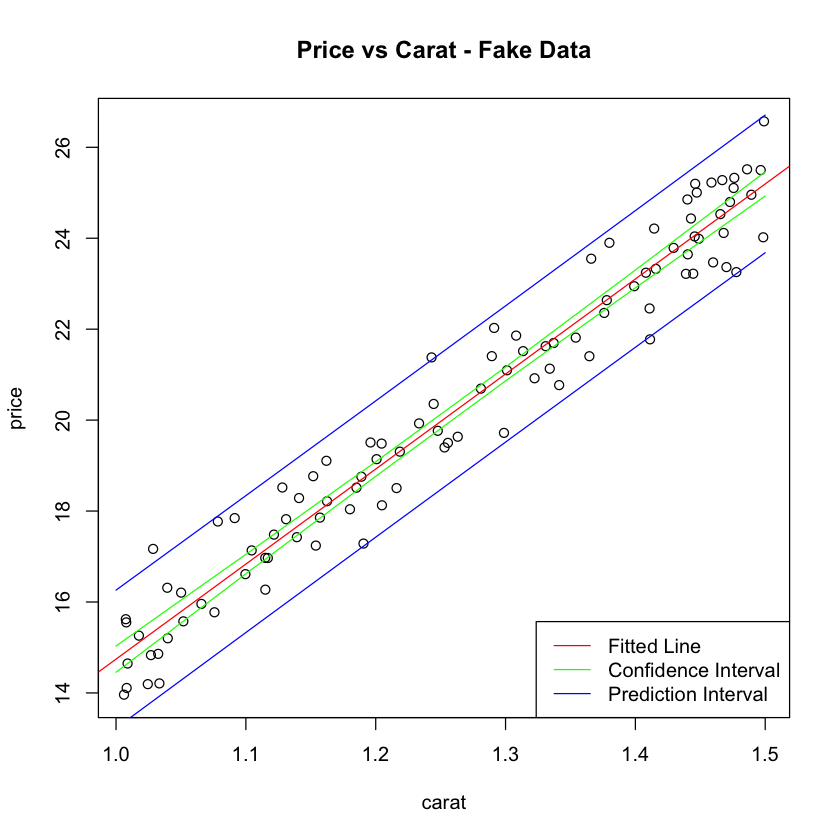

In [14]:
CI <- predict(fit1, newdata = data.frame(Carat=seq(1,1.5,0.1)), interval = "confidence")
PI <- predict(fit1, newdata = data.frame(Carat=seq(1,1.5,0.1)), interval = "prediction")
plot(x = carat, y = price, main = "Price vs Carat - Fake Data")
# Draw the best fit line from our linear model.
abline(fit1, col = "red")
lines(x = seq(1,1.5,0.1), y = CI[,2], col = "green")
lines(x = seq(1,1.5,0.1), y = CI[,3], col = "green")

lines(x = seq(1,1.5,0.1), y = PI[,2], col = "blue")
lines(x = seq(1,1.5,0.1), y = PI[,3], col = "blue")

legend("bottomright", col = c("red", "green", "blue"), lty = c(1,1,1),
       legend = c("Fitted Line", "Confidence Interval", "Prediction Interval"))

##### Programming-wise, simple linear regression and multiple linear regressions are the same.
## 10.2 Analysis of Variance
### 10.2.1 ANOVA without regression
Recall that we could use t-test to test whether two treatment effects are significantly different.

In [15]:
price.G <- subset(x = diamond, Color == "G")$Price
price.H <- subset(x = diamond, Color == "H")$Price
mu.G <- mean(price.G)
mu.H <- mean(price.H)
mu.tot <- mean(diamond$Price)
data.frame(G=mu.G, H=mu.H, Total=mu.tot)

G,H,Total
<dbl>,<dbl>,<dbl>
21.54011,19.09459,20.26844


In [16]:
t.test(price.G, price.H)


	Welch Two Sample t-test

data:  price.G and price.H
t = 3.8049, df = 97.895, p-value = 0.0002472
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.170011 3.721021
sample estimates:
mean of x mean of y 
 21.54011  19.09459 


##### This is a direct comparison of the two means.
- G color is significantly more expensive than H color.

##### We can also use the variance to test whether two groups are different. How?
- Decompose the total variation in the dataset into within group variation and between group variation.
- Think of the test as: if too much of the total variation comes from the between group variation, we believe that the two groups are different.

In [17]:
myanova <- aov(Price~Color, data = diamond)
summary(myanova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Color        1  149.3  149.27   14.42 0.000254 ***
Residuals   98 1014.4   10.35                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##### The null hypothesis that the two groups are equal is rejected.

In [18]:
# Reproduce the test result from scratch
# ss means sum of squares
ss.within = sum((price.G-mu.G)^2) + sum((price.H-mu.H)^2)
ss.between = (mu.G-mu.tot)^2 * 48 + (mu.H-mu.tot)^2 * 52
ss.total = sum((price-mu.tot)^2)
data.frame(Within = ss.within, Between = ss.between, Total = ss.total)

Within,Between,Total
<dbl>,<dbl>,<dbl>
1014.435,149.2745,1163.709


### 10.2.2 ANOVA in regression
- We saw that the calculations involve within group variance calculation for each group.
- We had 2 groups. What if we had more?
- What if we had many more? e.g. carat in the first dataset - a continuous variable.

In [19]:
head(diamond$Carat, 20)

[1] 1.489319 1.477755 1.051832 1.411278 1.162526 1.465442 1.281010 1.445680
 [9] 1.091369 1.216049 1.308155 1.180157 1.200656 1.116895 1.298791 1.354076
[17] 1.114982 1.139252 1.017605 1.039837

#### The logic:  fit a linear model, decompose the total variation into model variation (between group) and residual variation (within group).

In [20]:
anova(fit1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Carat,1,1108.44923,1108.4492293,1965.767,1.167533e-66
Residuals,98,55.25986,0.5638761,NA,NA


In [21]:
anova(fit2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Carat,1,1108.44923,1108.4492293,4426.0268,9.597565e-83
Color,1,30.96729,30.9672870,123.6521,5.228797e-19
Residuals,97,24.29257,0.2504389,NA,NA


#### Compare two regression models.
- Our fit1 is a reduced version of fit2
- Test whether the deletion of "Color" significantly affect model fit.
    - Rejected: use full model.

In [22]:
print(anova(fit1, fit2))

Analysis of Variance Table

Model 1: Price ~ Carat
Model 2: Price ~ Carat + Color
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1     98 55.260                                  
2     97 24.293  1    30.967 123.65 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Assignment 2